In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [2]:
import world_bank_data as wb

pop = pd.DataFrame(wb.get_series('SP.POP.TOTL', mrv=1))
pop = pop.reset_index()

In [3]:
median_age = pd.read_csv('./WHS9_86,WHS9_88,WHS9_89,WHS9_92,WHS9_96,WHS9_97,WHS9_90.csv', \
                         index_col=[0])

In [4]:
median_age = median_age.iloc[1:,0]

In [5]:
median_age[median_age.index == 'United States']

Series([], Name: Population median age (years), dtype: float64)

In [6]:
df_c = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', \
                 parse_dates=True)

In [7]:
df_c = df_c[df_c['Province/State'] != 'Diamond Princess']
df_c = df_c[df_c['Province/State'] != 'Grand Princess']
df_c = df_c.groupby('Country/Region').sum()
df_c = df_c.T
df_c = df_c.drop('Lat')
df_c = df_c.drop('Long')
df_c = df_c.rename(columns={"US": "United States of America"}, errors="raise")
df_c = df_c.rename(columns={"Korea, South": "Republic of Korea"}, errors="raise")
df_c = df_c.rename(columns={"Iran": "Iran (Islamic Republic of)"}, errors="raise")
df_c = df_c.rename(columns={"United Kingdom": "United Kingdom of Great Britain and Northern Ireland"}, errors="raise")
df_c.columns
df_c.index = pd.to_datetime(df_c.index)
df_c.index.name = 'Date'

In [8]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv', \
                 parse_dates=True)

In [9]:
df = df[df['Province/State'] != 'Diamond Princess']
df = df[df['Province/State'] != 'Grand Princess']
df = df.groupby('Country/Region').sum()
df = df.T
df = df.drop('Lat')
df = df.drop('Long')
df = df.rename(columns={"US": "United States of America"}, errors="raise")
df = df.rename(columns={"Korea, South": "Republic of Korea"}, errors="raise")
df = df.rename(columns={"Iran": "Iran (Islamic Republic of)"}, errors="raise")
df = df.rename(columns={"United Kingdom": "United Kingdom of Great Britain and Northern Ireland"}, errors="raise")
df.columns
df.index = pd.to_datetime(df.index)
df.index.name = 'Date'

In [10]:
today = df.iloc[-1]

In [11]:
print(today[(today >= 100) & (today < 1000)].index)
print(today[(today >= 1000) & (today < 10000)].index)
print(today[(today >= 10000)].index)

Index(['France', 'Republic of Korea', 'Netherlands',
       'United States of America',
       'United Kingdom of Great Britain and Northern Ireland'],
      dtype='object', name='Country/Region')
Index(['China', 'Iran (Islamic Republic of)', 'Italy', 'Spain'], dtype='object', name='Country/Region')
Index([], dtype='object', name='Country/Region')


In [12]:
condition = today[(today > 25)].index
print(list(condition))

['Belgium', 'China', 'France', 'Germany', 'Indonesia', 'Iran (Islamic Republic of)', 'Italy', 'Japan', 'Republic of Korea', 'Netherlands', 'Spain', 'Switzerland', 'Turkey', 'United States of America', 'United Kingdom of Great Britain and Northern Ireland']


In [13]:
countries = list(condition)
# countries.remove('Iran')
# countries.remove('China')
# countries.append('Canada')

min_case_num = 1
min_case_pct = 1/100000.
title_name = "countries with >25 deaths"

In [14]:
data = {}
data_original = {}
data_pct = {}

for c in countries:
    data_original[c] = df[c]

    country = df[c]
    country100 = country[country >= min_case_num]
    country100 = country100.reset_index()
    data[c] = country100[c]
    
#     size = pop[pop['Country'] == c]['SP.POP.TOTL']
#     df[c+' (by population)'] = df[c] * 1. / int(size)

#     country_pct = df[c+' (by population)']
#     country0_00001 = country_pct[country_pct >= min_case_pct]
#     country0_00001 = country0_00001.reset_index()
#     data_pct[c] = country0_00001[c+' (by population)']

In [15]:
scatter = {}

for c in countries:
    m_age = median_age[median_age.index == c]
    m_age = m_age[0]
    num_death = df[c][-1]
    num_confirmed = df_c[c][-1]
    death_rate = num_death/num_confirmed * 100.

#     print(c)
#     print(m_age)
#     print(num_death)
#     print(num_confirmed)
#     print(death_rate)
#     print('---')
    
    scatter[c] = [m_age, death_rate, num_death, num_confirmed]
    
# print(scatter)
df_death = pd.DataFrame(data=scatter).T
df_death = df_death.reset_index()
df_death = df_death.rename(columns={'index': "country", 0: "median age", 1: "death rate", 2: "deaths", 3: "confirmed"})

In [16]:
df_death

,country,median age,death rate,deaths,confirmed
0,Belgium,41.6,2.205234,75.0,3401.0
1,China,37.4,4.011204,3265.0,81397.0
2,France,40.6,4.166667,674.0,16176.0
3,Germany,45.5,0.377920,94.0,24873.0
4,Indonesia,27.8,9.338521,48.0,514.0
5,Iran (Islamic Republic of),28.5,7.787226,1685.0,21638.0
6,Italy,44.3,9.259698,5476.0,59138.0
7,Japan,45.9,3.683241,40.0,1086.0
8,Republic of Korea,39.4,1.168933,104.0,8897.0
9,Netherlands,41.8,4.269450,180.0,4216.0


Text(0, 0.5, 'Death rate %')

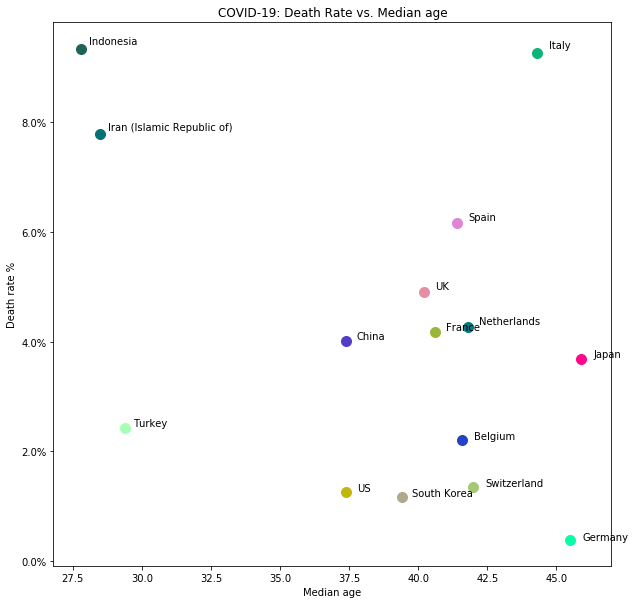

In [17]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

# import matplotlib.cm as cm
import matplotlib.colors as colors

# df_death.plot.scatter(x='median age',
#                       y='death rate',
#                       label='country',
#                       ax=axes)

# x = df_death['median age']
# y = df_death['death rate']
# l = df_death['country']

# colormap = cm.viridis
# colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df_death['country']))]
colorlist = list(colors.ColorConverter.colors.keys())

for i,c in enumerate(list(df_death['country'])):
    x = df_death['median age'][i]
    y = df_death['death rate'][i]
    l = df_death['country'][i]

    axes.scatter(x, y, label=l, s=100, c=colorlist[(i+21) % len(colorlist)])
    
    if l == 'United States of America':
        axes.annotate('US', (x*1.01, y*1.01))
    elif l == 'Republic of Korea':
        axes.annotate('South Korea', (x*1.01, y*1.01))
    elif l == 'United Kingdom of Great Britain and Northern Ireland':
        axes.annotate('UK', (x*1.01, y*1.01))
    else:
        axes.annotate(l, (x*1.01, y*1.01))

# axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("COVID-19: Death Rate vs. Median age")
axes.set_xlabel("Median age")
axes.set_ylabel("Death rate %")

Text(0.5, 0, 'Days after passing 1 death')

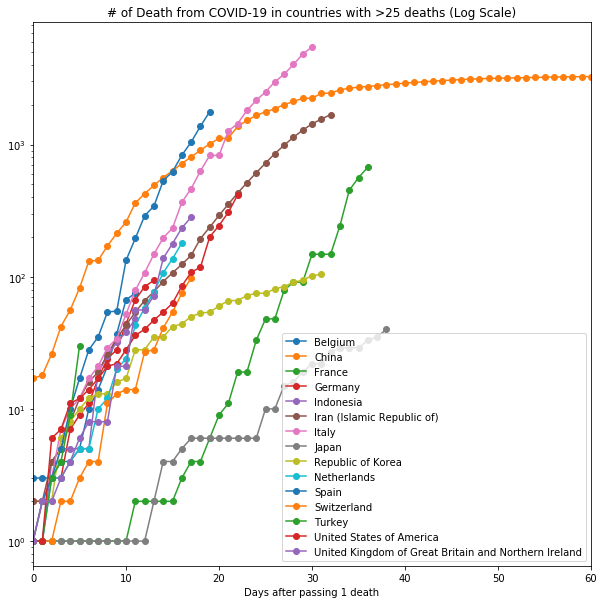

In [18]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data[c].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Death from COVID-19 in " + title_name + " (Log Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " death")

Text(0.5, 0, 'Days after passing 1 death')

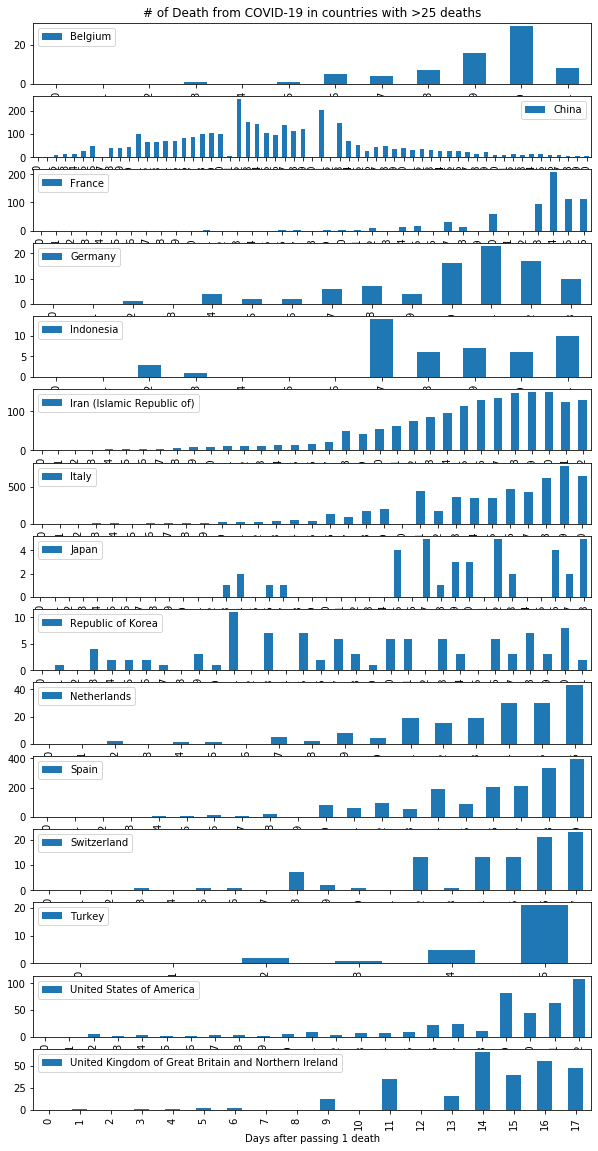

In [19]:
fig, axes = plt.subplots(len(data.keys()), figsize=(10, 20))

i = 0
for c in data.keys():
    data[c].diff().plot(ax=axes[i], kind="bar")
    axes[i].legend()
    i += 1

axes[0].set_title("# of Death from COVID-19 in " + title_name)
axes[-1].set_xlabel("Days after passing " + str(min_case_num) + " death")